In [1]:
# All Imports

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import random
import time
import pydicom
import glob
from numba import jit
from skimage import filters
import copy
from scipy import ndimage, misc


#import cv2
import sys
import matplotlib.pyplot as plt
import random
#from scipy.misc import imresize

import copy


# GAN model


import matplotlib.pyplot as plt
import sys

#from scipy.misc import imsave
import scipy.stats
from skimage.measure import compare_ssim as ssim
import pydicom
from sklearn.cluster import KMeans
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from skimage import exposure
import glob
#from scipy.misc import imread
from sklearn.metrics import mean_squared_error
from skimage.measure import compare_psnr
import numpy
from numpy.fft import fft2, ifft2, fftshift
import scipy.ndimage.interpolation as ndii

import torch
import torch.utils.data as data_utils
import torch.optim as optim
from torch.autograd import Variable

import torch.nn as nn

In [145]:
# [STAR] PyTorch models for training the regularizer


class RegCNN(nn.Module):
    def __init__ (self):
        super().__init__()
        
        self.out_features = 125
        self.in_features  = 125
        
        self.weight = torch.nn.Parameter(torch.randn(self.out_features, self.in_features))
        self.bias   = torch.nn.Parameter(torch.randn(self.out_features, 1))

    def forward(self, x):
        x = torch.matmul(self.weight, x)
        x = self.bias + x
        x = torch.tanh(x)
        x = torch.mean(x, dim=0)
        return(x)

class RegCNNA(nn.Module):
    def __init__ (self):
        super().__init__()
        
        self.in_features   = 125
        self.out_features1 = 125
        self.out_features2 = 125
        self.out_features3 =   5
        
        self.weight1 = torch.nn.Parameter(torch.randn(self.out_features1, self.in_features))
        self.bias1   = torch.nn.Parameter(torch.randn(self.out_features1, 1))
        
        self.weight2 = torch.nn.Parameter(torch.randn(self.out_features2, self.out_features1))
        self.bias2   = torch.nn.Parameter(torch.randn(self.out_features2, 1))
        
        #self.weight3 = torch.nn.Parameter(torch.randn(self.out_features3, self.out_features2))
        #self.bias3   = torch.nn.Parameter(torch.randn(self.out_features3, 1))

    def forward(self, x):
        x = torch.matmul(self.weight1, x)
        x = self.bias1 + x
        x = torch.tanh(x)
        
        x = torch.matmul(self.weight2, x)
        x = self.bias2 + x
        x = torch.tanh(x)
        
        #x = torch.matmul(self.weight3, x)
        #x = self.bias3 + x
        #x = torch.tanh(x)
        #print(x[124])
        
        x = torch.mean(x, dim=0)
        return x

class RegCNNC(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.filter0 = 16
        self.filter1 = 16
        self.filter2 = 8
        self.filter3 = 64
        self.filter4 = 64
        
        self.conv_block1 = nn.Sequential(
            nn.Conv3d(1, self.filter0, kernel_size=5, stride=1, padding=0),
            nn.ReLU())
        
        #self.conv_block2 = nn.Sequential(
        #    nn.Conv3d(self.filter0, self.filter1, kernel_size=5, stride=1, padding=2),
        #    nn.ReLU())
        
        #self.conv_block3 = nn.Sequential(
        #    nn.Conv3d(self.filter1, 1, kernel_size=5, stride=1, padding=2),
        #    nn.ReLU())
            #nn.MaxPool3d(2, stride=2))
        
#         self.conv_block4 = nn.Sequential(
#             nn.Conv3d(self.filter2, self.filter3, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool3d(2, stride=2))
        
#         self.conv_block5 = nn.Sequential(
#             nn.Conv3d(self.filter3, self.filter4, kernel_size=3, stride=1, padding=1),
#             nn.ReLU())
        #self.conv_block4 = nn.MaxPool3d(2, stride=2)
        

    def forward(self, x):
        x = self.conv_block1(x)
        #print('x shape is ', x.shape)
        #x = self.conv_block2(x)
        #print('x shape is ', x.shape)
        #x = self.conv_block3(x)
        
        out, _ = torch.max(x, 1)
        out = torch.reshape(out, [-1, 1])
        return out

class RegCNND(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.filter0 = 16
        self.filter1 = 16
        self.filter2 = 16
        self.filter3 = 64
        self.filter4 = 64
        
        self.conv_block1 = nn.Sequential(
            nn.Conv3d(1, self.filter0, kernel_size=5, stride=1, padding=0),
            nn.ReLU())
        
        self.conv_block2 = nn.Sequential(
            nn.Conv3d(1, self.filter0, kernel_size=5, stride=1, padding=0),
            nn.ReLU())
        
        self.conv_block3 = nn.Sequential(
            nn.Conv3d(1, self.filter0, kernel_size=5, stride=1, padding=0),
            nn.ReLU())
    
    def forward(self, x, x1, x2):
        x    = self.conv_block1(x)
        x    = torch.sum(x, 1)
        
        x1   = self.conv_block2(x1)
        x1   = torch.sum(x1, 1)
        
        x2   = self.conv_block3(x2)
        x2   = torch.sum(x2, 1)
        
        out = x + x1 + x2
        out = torch.reshape(out, [-1, 1])
        return out

class RegCNNE(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.filter0 = 64
        self.filter1 = 16
        self.filter2 = 16
        self.filter3 = 64
        self.filter4 = 64
        
        self.conv_block1 = nn.Sequential(
            nn.Conv3d(3, self.filter0, kernel_size=5, stride=1, padding=0),
            nn.ReLU())
        
    
    def forward(self, x):
        x    = self.conv_block1(x)
        x    = torch.sum(x, 1)
        
        out = x
        out = torch.reshape(out, [-1, 1])
        return out

class RegCNNF(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.filter0 = 16
        self.filter1 = 16
        self.filter2 = 8
        self.filter3 = 64
        self.filter4 = 64
        
        self.conv_block1 = nn.Sequential(
            nn.Conv3d(1, self.filter0, kernel_size=5, stride=1, padding=2),
            nn.ReLU())
        
        #self.conv_block2 = nn.Sequential(
        #    nn.Conv3d(self.filter0, self.filter1, kernel_size=5, stride=1, padding=2),
        #    nn.ReLU())
        
        #self.conv_block3 = nn.Sequential(
        #    nn.Conv3d(self.filter1, 1, kernel_size=5, stride=1, padding=2),
        #    nn.ReLU())
            #nn.MaxPool3d(2, stride=2))
        
#         self.conv_block4 = nn.Sequential(
#             nn.Conv3d(self.filter2, self.filter3, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool3d(2, stride=2))
        
#         self.conv_block5 = nn.Sequential(
#             nn.Conv3d(self.filter3, self.filter4, kernel_size=3, stride=1, padding=1),
#             nn.ReLU())
        #self.conv_block4 = nn.MaxPool3d(2, stride=2)
        

    def forward(self, x):
        x = self.conv_block1(x)
        #print('x shape is ', x.shape)
        #x = self.conv_block2(x)
        #print('x shape is ', x.shape)
        #x = self.conv_block3(x)
        
        x    = torch.sum(x, 1)
        out =  torch.reshape(x, [-1, 1, 5, 5, 5])
        return out

class RegCNNG(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.filter0 = 16
        self.filter1 = 16
        self.filter2 = 8
        self.filter3 = 64
        self.filter4 = 64
        
        self.conv_block1 = nn.Sequential(
            nn.Conv3d(1, self.filter0, kernel_size=5, stride=1, padding=2),
            nn.ReLU())
        
        self.conv_block2 = nn.Sequential(
           nn.Conv3d(self.filter0, self.filter1, kernel_size=5, stride=1, padding=0),
           nn.ReLU())
        
        #self.conv_block3 = nn.Sequential(
        #    nn.Conv3d(self.filter1, 1, kernel_size=5, stride=1, padding=2),
        #    nn.ReLU())
            #nn.MaxPool3d(2, stride=2))
        
#         self.conv_block4 = nn.Sequential(
#             nn.Conv3d(self.filter2, self.filter3, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool3d(2, stride=2))
        
#         self.conv_block5 = nn.Sequential(
#             nn.Conv3d(self.filter3, self.filter4, kernel_size=3, stride=1, padding=1),
#             nn.ReLU())
        #self.conv_block4 = nn.MaxPool3d(2, stride=2)
        

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        
        #print('x shape is ', x.shape)
        #x = self.conv_block2(x)
        #print('x shape is ', x.shape)
        #x = self.conv_block3(x)
        
        x    = torch.sum(x, 1)
        out =  torch.reshape(x, [-1, 1])
        return out

class RegCNNH(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.filter0 = 8
        self.filter1 = 8
        self.filter2 = 8
        
        self.conv_block1 = nn.Sequential(
            nn.Conv3d(1, self.filter0, kernel_size=5, stride=1, padding=2),
            nn.ReLU())
        
        self.conv_block2 = nn.Sequential(
           nn.Conv3d(1, self.filter1, kernel_size=5, stride=1, padding=2),
           nn.ReLU())
        
        self.conv_block3 = nn.Sequential(
           nn.Conv3d(1, self.filter2, kernel_size=5, stride=1, padding=2),
           nn.ReLU())
        
        self.conv_block4 = nn.Sequential(
           nn.Conv3d(1, self.filter2, kernel_size=5, stride=1, padding=2),
           nn.ReLU())
        
        self.conv_block5 = nn.Sequential(
           nn.Conv3d(1, self.filter2, kernel_size=5, stride=1, padding=0),
           nn.ReLU())
        
        #self.conv_block3 = nn.Sequential(
        #    nn.Conv3d(self.filter1, 1, kernel_size=5, stride=1, padding=2),
        #    nn.ReLU())
            #nn.MaxPool3d(2, stride=2))
        
#         self.conv_block4 = nn.Sequential(
#             nn.Conv3d(self.filter2, self.filter3, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(),
#             nn.MaxPool3d(2, stride=2))
        
#         self.conv_block5 = nn.Sequential(
#             nn.Conv3d(self.filter3, self.filter4, kernel_size=3, stride=1, padding=1),
#             nn.ReLU())
        #self.conv_block4 = nn.MaxPool3d(2, stride=2)
        

    def forward(self, x):
        inputx = x
        
        x = self.conv_block1(x)
        x = torch.sum(x, 1)
        x = torch.reshape(x, [-1, 1, 5, 5, 5])
        
        x = inputx + x
        x = self.conv_block2(x)
        x = torch.sum(x, 1)
        x = torch.reshape(x, [-1, 1, 5, 5, 5])
        
        #x = inputx + x
        #x = self.conv_block3(x)
        #x = torch.sum(x, 1)
        #x = torch.reshape(x, [-1, 1, 5, 5, 5])
        
        #x = inputx + x
        #x = self.conv_block4(x)
        #x = torch.sum(x, 1)
        #x = torch.reshape(x, [-1, 1, 5, 5, 5])
        
        x = inputx + x
        x = self.conv_block5(x)
        x = torch.sum(x, 1)
        
        #x = torch.reshape(x, [-1, 1, 5, 5, 5])
        
        #print('x shape is ', x.shape)
        #x = self.conv_block2(x)
        #print('x shape is ', x.shape)
        #x = self.conv_block3(x)
        
        #x    = torch.sum(x, 1)
        out =  torch.reshape(x, [-1, 1])
        return out

class RegCNNI(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.filter0 = 125
        self.filter1 = 125
        self.filter2 = 125
        
        self.conv_block1 = nn.Sequential(
            nn.Conv3d(1, self.filter0, kernel_size=5, stride=1, padding=0),
            nn.ReLU())
        
        self.conv_block2 = nn.Sequential(
           nn.Conv3d(1, self.filter1, kernel_size=5, stride=1, padding=0),
           nn.ReLU())
        
    
    def forward(self, x):
        inputx = x
        
        x = self.conv_block1(x)
        x = torch.reshape(x, [-1, 1, 5, 5, 5])
        
        x = inputx + x
        x = self.conv_block2(x)
        x = torch.sum(x, 1)
        
        #x = torch.reshape(x, [-1, 1, 5, 5, 5])
        
        #x = inputx + x
        #x = self.conv_block3(x)
        #x = torch.sum(x, 1)
        #x = torch.reshape(x, [-1, 1, 5, 5, 5])
        
        #x = inputx + x
        #x = self.conv_block4(x)
        #x = torch.sum(x, 1)
        #x = torch.reshape(x, [-1, 1, 5, 5, 5])
        
        #x = inputx + x
        #x = self.conv_block5(x)
        #x = torch.sum(x, 1)
        
        #x = torch.reshape(x, [-1, 1, 5, 5, 5])
        
        #print('x shape is ', x.shape)
        #x = self.conv_block2(x)
        #print('x shape is ', x.shape)
        #x = self.conv_block3(x)
        
        #x    = torch.sum(x, 1)
        out =  torch.reshape(x, [-1, 1])
        return out
    
model  = RegCNNI()
inx    = torch.tensor(np.random.rand(10, 1, 5, 5, 5).astype('float32'))
print(inx.shape)
result = model.forward(inx)
print(result.shape)

torch.Size([10, 1, 5, 5, 5])
torch.Size([10, 1])


In [7]:
# [STAR] Model for training the de-noising network

img_shape  = (256, 256, 1)

def huber_loss(y_true, y_pred, clip_delta=0.04):
    error        = y_true - y_pred
    cond         = tf.keras.backend.abs(error) < clip_delta
    squared_loss = 0.5 * tf.keras.backend.square(error)
    linear_loss  = clip_delta * (tf.keras.backend.abs(error) - 0.5 * clip_delta)
    return tf.where(cond, squared_loss, linear_loss)

def huber_loss_mean(y_true, y_pred, clip_delta=1.0):
    return tf.keras.backend.mean(huber_loss(y_true, y_pred, clip_delta))

class AdversarialAutoencoder():
    def __init__(self):
        self.optimizer1  = RMSprop(0.0005)
        self.optimizer2  = RMSprop(0.00001)
        
        self.clip_value = 0.01
        
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        
        
        #self.discriminator.load_weights('/media/pranjal/de24af8d-2361-4ea2-a07a-1801b54488d9/DBT_data/Results/vanilla-gan-weights-mse-0.1/discriminator_weights_8050.h5')
        self.d_arr = []
        self.g_arr = []
        
        # Build the encoder / decoder
        self.generator = self.build_generator()
         
        img = Input(shape=img_shape)
        # The generator takes the image, encodes it and reconstructs it
        # from the encoding
        reconstructed_img            = self.generator(img)
        #self.adversarial_autoencoder = Model(img, reconstructed_img)
        #self.adversarial_autoencoder.compile()
        # For the adversarial_autoencoder model we will only train the generator
        self.discriminator.trainable = False
        
        # The discriminator determines validity of the cleaned image
        validity = self.discriminator(reconstructed_img)

        # The adversarial_autoencoder model  (stacked generator and discriminator)
        self.adversarial_autoencoder = Model(img, [reconstructed_img, validity])
        self.adversarial_autoencoder.compile(loss=[huber_loss_mean, 'mse'],
            loss_weights=[0.9, 0.1],
            optimizer=self.optimizer2)
        
        self.discriminator.trainable = True
        self.discriminator.compile(loss='mse',
            optimizer=self.optimizer1, 
            metrics=['accuracy'])
        #self.discriminator.load_weights('/media/pranjal/de24af8d-2361-4ea2-a07a-1801b54488d9/DBT_data/Results/gan-proj-mse-0.99-sub-weights/discriminator_weights_8400.h5')
        #self.generator.load_weights('/media/pranjal/de24af8d-2361-4ea2-a07a-1801b54488d9/DBT_data/Results/gan-proj-mse-0.99-sub-weights/generator_weights_8400.h5')

    def wasserstein_loss(self, y_true, y_pred):
        return K.mean(y_true * y_pred)
    
    def build_autoencoder(self):
        self.generator.compile(loss=['mse'],optimizer=self.optimizer)
     
    def build_generator(self):
        x = Input(shape=img_shape)
        x1 = Conv2D(32, (3, 3), padding='same')(x)
        x1 = LeakyReLU(alpha=0.2)(x1)
        
        x2 = Conv2D(64, (3, 3), padding='same')(x1)
        #x2 = BatchNormalization(momentum=0.8)(x2)
        x2 = LeakyReLU(alpha=0.2)(x2)
        
        x3 = Conv2D(64, (3, 3), padding='same')(x2)
        #x3 = BatchNormalization(momentum=0.8)(x3)
        x3 = LeakyReLU(alpha=0.2)(x3)
        
        #x3_m = merge([x2, x3], mode='concat', concat_axis=3)
        x4 = Conv2D(64, (3, 3), padding='same')(x3)
        #x4 = BatchNormalization(momentum=0.8)(x4)
        x4 = LeakyReLU(alpha=0.2)(x4)
        #x6_i = merge([x2, x6], mode='concat', concat_axis=3)
        
        
        x5 = Conv2D(128, (3, 3), padding='same')(x4)\
        #x5 = BatchNormalization(momentum=0.8)(x5)
        x5 = LeakyReLU(alpha=0.2)(x5)
        
        #x7_i = merge([x1, x7], mode='concat', concat_axis=3)
        x6 = Conv2D(128, (3, 3), padding='same')(x5)
        x6 = LeakyReLU(alpha=0.2)(x6)
        
        x7 = Conv2D(64, (3, 3), padding='same')(x6)
        #x8 = BatchNormalization(momentum=0.8)(x8)
        x7 = LeakyReLU(alpha=0.2)(x7)
        #x7_m = merge([x1, x6], mode='concat', concat_axis=3)
        #x8    = Conv2D(1, (3, 3), activation='relu', padding='same')(x6)
        x8 = Conv2D(1, (3, 3), padding='same')(x7)
        x8 = LeakyReLU(alpha=0.2)(x8)
        
        out = keras.layers.Subtract()([x, x8])
        #out = ReLU()(out)
        model = Model(x, out)
        return model

    def build_discriminator(self):
        model = Sequential()
        model.add(Conv2D(64, (3, 3), input_shape=img_shape))
        model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.25))
        model.add(Conv2D(64,  (3, 3),  strides=(2, 2)))
        #model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.25))
        model.add(Conv2D(64, (3, 3)))
        #model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.25))
        #         model.add(Conv2D(16, (6, 6),  strides=(2, 2)))
        #         model.add(LeakyReLU(alpha=0.2))
        #         model.add(Dropout(0.5))
        model.add(Conv2D(64, (3, 3),  strides=(2, 2)))
        #model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.25))
        model.add(Conv2D(128, (3, 3)))
        #model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(128, (3, 3),  strides=(2, 2)))
        #model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        #model.add(Dropout(0.25))
        model.add(Dense(1))
        return model
    
    def train_generator_autoencoder(self, epochs, batch_size=128):
        for epoch in range(epochs):
            # Load the dataset
            X_train, Y_train = get_train_data(epoch, batch_size)
            
            X_train = np.expand_dims(X_train, axis=3)
            Y_train = np.expand_dims(Y_train, axis=3)
            
            g_loss = self.generator.train_on_batch(X_train, Y_train)
            
            # Plot the progress
            print ("Epoch ", epoch, " G loss ", g_loss)
            if epoch%50 == 0:
                store_results(epoch)
                self.generator.save_weights(savepath+modelname+'-weights/generator_weights_'+str(epoch)+'.h5')
                self.discriminator.save_weights(savepath+modelname+'-weights/discriminator_weights_'+str(epoch)+'.h5')
    
    def train(self, epochs, batch_size=128, sampling=50, saveseed=5, startepoch=0, discriminator_epochs=5):
        for epoch in range(startepoch, epochs):
            # Train the discriminator 5 times
            #print('Training Discriminator ', epoch)
            
            projindex = str(random.randint(43, 68))#+'.dcm'
    
            lowfilename  = projectionpath+'3200x1600x25.'+str(projindex)+'.raw'
            highfilename = highprojectionpath+'3200x1600x25.'+str(projindex)+'.raw'

            lowimg  = np.fromfile(lowfilename, dtype='float32')
            highimg = np.fromfile(highfilename, dtype='float32')
            
            lowvol  = np.reshape(lowimg,  [25, 1600, 3200])/1250.0
            highvol = np.reshape(highimg, [25, 1600, 3200])/3750.0
            
            for itd in range(discriminator_epochs):
                slice_index = random.randint(0, 24)
                lowimg      = lowvol[slice_index]
                highimg     = highvol[slice_index]
                
                # get the cropped image
                lowimg, highimg =  get_crop_image(lowimg, highimg)
                
                # Load the dataset
                X_train, Y_train = get_train_data_proj(lowimg, highimg, epoch, batch_size)
                X_train = X_train - 0.5
                Y_train = Y_train - 0.5
                
                #print(X_train.shape, Y_train.shape)
                
                X_train = np.expand_dims(X_train, axis=3)
                Y_train = np.expand_dims(Y_train, axis=3)

                # Adversarial ground truths
                valid = np.ones((batch_size, 1))
                fake  = np.zeros((batch_size, 1))

                # ---------------------
                #  Train Discriminator
                # ---------------------
                # get the noisy image and feed it into the generator
                X_train_clean = self.generator.predict(X_train)

                # Train the discriminator (real classified as ones and generated as zeros)
                d_loss_real = self.discriminator.train_on_batch(Y_train, valid)
                d_loss_fake = self.discriminator.train_on_batch(X_train_clean, fake)
                d_loss      = 0.5 * np.add(d_loss_real, d_loss_fake)
            
            #print('Training Generator ', epoch)
            # ---------------------
            #  Train Generator
            # ---------------------
            # Train the generator
            g_loss = self.adversarial_autoencoder.train_on_batch(X_train, [Y_train, valid])
            #print('g_loss ', g_loss)
            self.d_arr.append(d_loss)
            self.g_arr.append(g_loss)
            
            #print('Epoch ', epoch, ' Total D loss ', -d_loss, ' D loss real ', -d_loss_real, ' D loss fake ', d_loss_fake, ' G_loss ', g_loss[0], g_loss[1], g_loss[2])
            # Plot the progress
            #print ("%d [D loss: %f] [G loss: %f] [G loss: %f %f]" % (epoch, 1 - d_loss, 1 - g_loss[0], g_loss[0], g_loss[1]))
            #print('Epoch ', epoch, ' Total D loss ', -d_loss, ' G_loss ', g_loss[0], g_loss[1], g_loss[2])
            
            if epoch%sampling == 0:
                store_results(epoch, saveseed)
                self.generator.save_weights(savepath+modelname+'-weights/generator_weights_'+str(epoch)+'.h5')
                #self.discriminator.save_weights(savepath+modelname+'-weights/discriminator_weights_'+str(epoch)+'.h5')
            
            print ("%d [D loss: %f, mean_acc: %.2f%% real_acc: %.2f%% fake_acc: %.2f%%] [G loss: %f, mse: %f]" % (epoch, d_loss[0], 100*d_loss[1], 100*d_loss_real[1], 100*d_loss_fake[1], g_loss[2]*0.0001, g_loss[1]*0.999))

In [1]:
import numpy as np
index = 68
all_proj = np.fromfile("/media/pranjal/cewitdata1/DBT-PROJ-DENOISE/NORMAL/3200x1600x25."+str(index)+".raw", dtype='float32')
all_proj = np.reshape(all_proj, [25, 1600, 3200])
                      
print(all_proj.shape)

(25, 1600, 3200)


In [6]:
a       = sio.loadmat("/media/pranjal/cewitdata2/DBT-PROJ-DENOISE/attenuation_values_cropped/LE/"+str(index)+".mat")["head"]
print(a.shape)        

(800, 448, 320)


In [82]:
# [STAR] Code to read the data

a = np.fromfile('/media/pranjal/cewitdata1/pranjal/CT-RECON-DATA/MC_CE27_slice32_atzz666_dense_uppaddle_pc_209923395_crop_1073x2748x816.raw', dtype='uint8')
a = np.reshape(a, [816, 2748, 1073])

print(a.shape)

temp = a[666]

(816, 2748, 1073)


In [77]:
np.save('calcification_cluster.npy', temp1)

(1140, 2415, 1740)


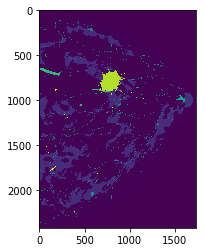

In [3]:
a = np.fromfile('/media/pranjal/cewitdata1/pranjal/CT-RECON-DATA/pcl_22183101_crop.raw', dtype='uint8')
a = np.reshape(a, [1140, 2415, 1740])
#  1740   2415   1140

print(a.shape)

#temp = a[666]
plt.imshow(a[500])

In [4]:
temp1 = np.load('calcification_cluster.npy')
print(temp1.shape)

(750, 350)


In [89]:
a1    = a[500, 1500:1500+temp1.shape[0], 150:150+temp1.shape[1]]
temp1[temp1 != 250] = a1[temp1 != 250]

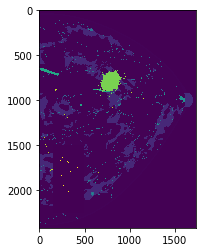

In [6]:
#a[499, 1500:1500+temp1.shape[0], 150:150+temp1.shape[1]] =  temp1
#a[500, 1500:1500+temp1.shape[0], 150:150+temp1.shape[1]] =  temp1
#a[501, 1500:1500+temp1.shape[0], 150:150+temp1.shape[1]] =  temp1

plt.imshow(a[501])

In [7]:
a.tofile('/media/pranjal/cewitdata1/pranjal/CT-RECON-DATA/pcl_22183101_crop_calci.raw')

In [641]:
e = np.fromfile('/media/pranjal/BackupPlus/REAL-DBT-PROJECTIONS/RECONS-HUBER/xiaoyu_data-LE-L-CC_3000x1200x58.4_4_0.0005_-0.5_1_anistropic_three_1.raw', dtype='float32')
e = np.reshape(e, [58, 1200, 3000])

temp               = e[27]#, 900:1150, 950:1350]
temp[temp < 0.03] = 0
temp[temp > 0.03] = 1
#plt.imshow(temp, cmap='gray')

non_zero_index = np.nonzero(temp)

print(non_zero_index[0].shape, non_zero_index[1].shape)
print(a.shape, b.shape, e.shape)

(858161,) (858161,)
(58, 1200, 3000) (58, 1200, 3000) (58, 1200, 3000)


(858161,) (858161,)
86378 86378 858161
(86378, 3, 5, 5, 5) (86378, 1) (86378, 1, 5, 5, 5) (86378, 1, 5, 5, 5)


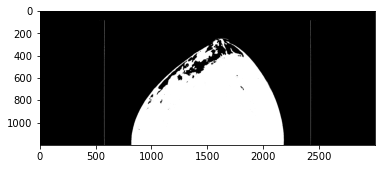

In [104]:
# [STAR] For creating the dataset to train the potential function

e = np.fromfile('/media/pranjal/BackupPlus/REAL-DBT-PROJECTIONS/RECONS-HUBER/xiaoyu_data-LE-L-CC_3000x1200x58.4_4_0.0005_-0.5_1_anistropic_three_1.raw', dtype='float32')
e = np.reshape(e, [58, 1200, 3000])

a = np.fromfile('/media/pranjal/BackupPlus/REAL-DBT-PROJECTIONS/RECONS-HUBER/xiaoyu_data-LE-L-CC_3200x1280x58.0_0_0.0005_0_1_anistropic_normal8_1.raw', dtype='float32')
#a = np.fromfile('/media/pranjal/BackupPlus/REAL-DBT-PROJECTIONS/RECONS-HUBER/xiaoyu_data-LE-L-CC_3000x1200x58.0_1_0.0005_0.5_1_anistropic_normalmlp1_1.raw', dtype='float32')
#a = np.fromfile('/media/pranjal/BackupPlus/REAL-DBT-PROJECTIONS/RECONS-HUBER/xiaoyu_data-LE-L-CC_3000x1200x58.0_0_0.0005_0.5_1_anistropic_normalmlp1_1.raw', dtype='float32')
a = np.reshape(a, [58, 1280, 3200])

#b = np.fromfile('/media/pranjal/BackupPlus/REAL-DBT-PROJECTIONS/RECONS-HUBER/xiaoyu_data-LE-L-CC_3000x1200x58.0_1_0.0005_0_1_anistropic_normal_1.raw', dtype='float32')
#b = np.reshape(b, [58, 1200, 3000])

#c = np.fromfile('/media/pranjal/BackupPlus/REAL-DBT-PROJECTIONS/RECONS-HUBER/xiaoyu_data-LE-L-CC_3000x1200x58.0_1_0.0005_0_1_anistropic_three_1.raw', dtype='float32')
#c = np.reshape(c, [58, 1200, 3000])

d = np.fromfile('/media/pranjal/BackupPlus/REAL-DBT-PROJECTIONS/RECONS-HUBER/xiaoyu_data-LE-L-CC_3200x1280x58.0_0_0.0005_-0.1_1_anistropic_three8_1.raw', dtype='float32')
d = np.reshape(d, [58, 1280, 3200])

#temp1 = a[:, 900:1150, 950:1350]
#D2    = d[:, 900:1150, 950:1350]

Y_array = d
X_array = a


# For getting the locations of the training data points

temp               = e[27]#, 900:1150, 950:1350]
temp[temp < 0.03] = 0
temp[temp > 0.03] = 1

#temp[temp < 0.045] = 0
plt.imshow(temp, cmap='gray')

non_zero_index = np.nonzero(temp)

print(non_zero_index[0].shape, non_zero_index[1].shape)
#print(a.shape, b.shape, e.shape)


# Generate the samples for the Regression Model

X      = []
X1     = []
X2     = []

Y      = []
voxels = 5


for i in range(non_zero_index[0].shape[0]):
    if np.random.rand() > 0.1:
        continue
    
    ind_z = random.randint(15, 45)
    ind_y = non_zero_index[0][i]
    ind_x = non_zero_index[1][i]
    
    tx = X_array[ind_z-2:ind_z+3, non_zero_index[0][i]-2:non_zero_index[0][i]+3, non_zero_index[1][i]-2:non_zero_index[1][i]+3]
    #ty = Y_array[ind_z-2:ind_z+3, non_zero_index[0][i]-2:non_zero_index[0][i]+3, non_zero_index[1][i]-2:non_zero_index[1][i]+3]
    ty = Y_array[ind_z,           non_zero_index[0][i], non_zero_index[1][i]]
    
    if len(tx.flatten()) ==  voxels*voxels*voxels:
        X.append([tx])# - X_array[ind_z, non_zero_index[0][i], non_zero_index[1][i]])
        X1.append([np.ones([5, 5, 5])*ind_z/58.0])
        X2.append([np.ones([5, 5, 5])*ind_y/1280.0])
        Y.append([ty])

print(len(X), len(Y), non_zero_index[0].shape[0])

X  =  np.array(X)
X1 =  np.array(X1)
X2 =  np.array(X2)
#X =  np.reshape(X, [X.shape[0], voxels*voxels*voxels])
Y =  np.array(Y)
#Y =  np.reshape(Y, [Y.shape[0], voxels*voxels*voxels])

X = np.concatenate([X, X1, X2], axis=1)
print(X.shape, Y.shape, X1.shape, X2.shape)

In [4]:
def weights_init_uniform(m):
    classname = m.__class__.__name__
    print('classname is ', classname)
    
    # for every Linear layer in a model..
    #if classname.find('Linear') != -1:
    # apply a uniform distribution to the weights and a bias=0
    m.weight1.data.uniform_(0.0, 0.03)
    m.bias1.data.data.uniform_(0.0, 0.03)#.fill_(0)
    
    m.weight2.data.uniform_(0.0, 0.03)
    m.bias2.data.data.uniform_(0.0, 0.03)#.fill_(0)

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.001)

#weights_init_uniform(model)

In [146]:
# For training the Regression Model using PyTorch

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

device         = torch.device("cuda:0")

model  = RegCNNI()
init_weights(model)
model.cuda()


#criterion          = nn.L1Loss(reduction='mean')#nn.MSELoss(reduction='mean')#nn.L1Loss(reduce=False, )#.MSELoss()
criterion1          = nn.MSELoss(reduction='mean')
criterion2          = nn.L1Loss(reduction='mean')

optimizer_student  = optim.Adam(model.parameters(), lr=0.0001)#, weight_decay=0.01)

def evaluate_result(model, valx, valy):
    model.eval()
    
    val_dice       = []
    batch_size     = 100
    for ik in range(len(valx)//batch_size):
        x = valx[ik*batch_size:(ik+1)*batch_size]#.T
        y = valy[ik*batch_size:(ik+1)*batch_size]
        
        if 0:
            x0 = np.expand_dims(x[:, 0], 1)
            x1 = np.expand_dims(x[:, 1], 1)
            x2 = np.expand_dims(x[:, 2], 1)
            
            x0 = torch.tensor(x0, device=device).float()
            x1 = torch.tensor(x1, device=device).float()
            x2 = torch.tensor(x2, device=device).float()
        else:
            x0 = np.expand_dims(x[:, 0], 1)
            x0 = torch.tensor(x0, device=device).float()
        
        if 0:
            output =  model.forward(x0, x1, x2)
        else:
            output =  model.forward(x0)
        
        output = output.data.cpu().numpy()
        
        dt = np.abs(y - output)
        dt = np.mean(dt)
        
        val_dice.append(dt)
    return val_dice

def train_model(model, batch_size, optimizer, criterion1, criterion2, trainx, trainy):
    loss_array = []
    
    model.train()
    
    for i in range(len(trainx)//batch_size):
        x = trainx[i*batch_size:(i+1)*batch_size]#.T
        y = trainy[i*batch_size:(i+1)*batch_size]#.T
        
        y  = torch.tensor(y, device=device).float()
        optimizer.zero_grad()
        
        if 0:
            x0 = np.expand_dims(x[:, 0], 1)
            x1 = np.expand_dims(x[:, 1], 1)
            x2 = np.expand_dims(x[:, 2], 1)
        
            x0 = torch.tensor(x0, device=device).float()
            x1 = torch.tensor(x1, device=device).float()
            x2 = torch.tensor(x2, device=device).float()
        else:
            x0 = np.expand_dims(x[:, 0], 1)
            x0 = torch.tensor(x0, device=device).float()
        
        if 0:
            output = model.forward(x0, x1, x2)
        else:
            output = model.forward(x0)
        
        loss1   = criterion1(output , y)
        loss2   = criterion2(output , y)
        loss    = loss2#loss1+ loss2
        loss.backward()
        
        loss_array.append(loss.item())
        optimizer.step()
    
    loss_array = np.mean(loss_array)
    return loss_array

#X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

prev_min = 1000

for i in range(10000):
    index = np.random.permutation(len(X_train))
    
    X_train = X_train[index]
    y_train = y_train[index]
    
    train_model(model, 32, optimizer_student, criterion1, criterion2, X_train, y_train)
    result = evaluate_result(model, X_test, y_test)
    
    if np.mean(result) < prev_min:
        prev_min = np.mean(result)
        print(i, 'Validation Accuracy ', np.mean(result))
        torch.save(model.state_dict(), 'new_modelI_three_layer_l1loss.pt')

0 Validation Accuracy  0.00025939112
2 Validation Accuracy  0.0002322952
9 Validation Accuracy  0.00016021625
12 Validation Accuracy  0.00015773677
16 Validation Accuracy  0.0001531725
26 Validation Accuracy  0.00014854637
29 Validation Accuracy  0.00014648587
30 Validation Accuracy  0.00014395086
32 Validation Accuracy  0.00014350735
34 Validation Accuracy  0.00014184168
37 Validation Accuracy  0.00014170015
42 Validation Accuracy  0.00013983225
54 Validation Accuracy  0.0001379678
55 Validation Accuracy  0.00013637583
57 Validation Accuracy  0.00013599663
62 Validation Accuracy  0.00013425971
65 Validation Accuracy  0.00013413944
71 Validation Accuracy  0.00013401444
82 Validation Accuracy  0.0001307002
87 Validation Accuracy  0.00012936546
96 Validation Accuracy  0.00012846198
102 Validation Accuracy  0.00012722783
112 Validation Accuracy  0.00012655917
114 Validation Accuracy  0.00012568849
118 Validation Accuracy  0.00012553507
134 Validation Accuracy  0.00012405393
146 Validation

In [83]:
# [STAR] Code to Predict results

# 8  Filters: 944 Validation Accuracy  0.00019152784
# 16 Filters: 191 Validation Accuracy  0.00016972028


def predict_result(model, valx, valy):
    model.eval()
    
    val_dice       = []
    batch_size     = 1
    
    result       = []
    ground_truth = []
    inputx       = []
    for ik in range(len(valx)//batch_size):
        x = valx[ik*batch_size:(ik+1)*batch_size]#.T
        y = valy[ik*batch_size:(ik+1)*batch_size]#.T
        
        x = np.expand_dims(x[:, 0], 1)
        
        x = torch.tensor(x, device=device).float()

        output = model.forward(x)
        output = output.data.cpu().numpy()
        
        inputx.append(x.data.cpu().numpy())
        result.append(output)
        ground_truth.append(y)
    
    return inputx, result, ground_truth

inputx, result, ground_truth = predict_result(model, X_test, y_test)


In [147]:
print(i)

9999


In [88]:
index = random.randint(0, len(ground_truth)-1)

print(ground_truth[index].flatten()[:10])
print(result[index].flatten()[:10])
ix = np.reshape(inputx[index], [5, 5, 5])

print(ix[2, 2, 2])

[0.03314869]
[0.03311555]
0.032477982


In [ ]:
# Result Comparison

# 1500  Validation Accuracy  0.005796282 -> 500       (Per voxel)
# 1500  Validation Accuracy  0.005799574 -> 125       (Per voxel)
# 1500  Validation Accuracy  0.006036232 ->  25       (Per voxel)
# 10000 Validation Accuracy  0.00512195  -> 500       (Per voxel) 
# 23427 Validation Accuracy  0.00366580  -> 125       (Per voxel)
# 1639  Validation Accuracy  0.00320234  -> 125 x 125 (Per voxel)
# 10100 Validation Accuracy  0.00266177  -> 125 x 125 (Per voxel)

# conv_prior_1-out_8-filter_0.0001368996_loss.pt -> 16 filter with padding -> all out
# 1500  Validation Accuracy  0.00013689  -> 125       (All voxels)

# 2501  Validation Accuracy  0.00012629  -> 125


# conv_prior_1-out_16-filter_loss.pt
# 3196 Validation Accuracy  0.00012279117

# conv_prior_1-out_8-filter_loss.pt
# 4542 Validation Accuracy  0.00012307017


# conv_prior_1-out_16-filter_loss_x_x1_x2.pt
# 5416 Validation Accuracy  0.00012176224



# Compare with and without coordinate
# conv_prior_1-out_64-filter_loss_x_x1_x2.pt
# 2384 Validation Accuracy  0.000119205004
# conv_prior_1-out_64-filter_loss.pt (3 times filter)
# 3114 Validation Accuracy  0.000119580625
# conv_prior_1-out_128-filter_loss_x0_x1_x2.pt
# 3411 Validation Accuracy  0.00011920285
# conv_prior_1-out_16-filter_loss.pt
# 2667 Validation Accuracy  0.00011919564
# conv_prior_1-out_16-filter_loss_max_operation.pt
# 2606 Validation Accuracy  0.00011918982
# conv_prior_1-out_16-filter_loss_max_operation_mseloss.pt
# 746 Validation Accuracy  0.00012135917 (trained for 7000 epochs)
# conv_prior_1-out_16-filter_loss_max_operation_mseloss_l1loss.pt
# 1493 Validation Accuracy  0.00011918354 (trained for 6907 epochs)


# Compare for all 125 voxels
# conv_prior_125-out_16-filter_loss_l1loss.pt
# 3400 Validation Accuracy  0.00014144198 (trained for 10000 epochs)
# conv_prior_125-out_16-filter_loss_mseloss.pt
# 5049 Validation Accuracy  0.00013886021 (trained for 10000 epochs)


# These results are together
# conv_prior_125-out_16-one-layer-filter_loss_l1loss.pt
# 2689 Validation Accuracy  0.00012106062  (trained for 10000 epochs)
# conv_prior_125-out_two-layer-sum-in-between-8-filter_loss_l1loss.pt
# 6191 Validation Accuracy 0.00011660263  (trained for 7084 epochs)
# conv_prior_125-out_16-two-layer-filter_loss_l1loss.pt
# 587 Validation Accuracy  0.0001153327   (trained for 2200 epochs)
# conv_prior_125-out_three-layer-sum-in-between-8-filter_loss_l1loss.pt
# 1926 Validation Accuracy  0.00011476242 (trained for 7185 epochs)
# conv_prior_125-out_16-three-layer-filter_loss_l1loss.pt
# 1211 Validation Accuracy  0.000114355775 (trained for 3200 epochs)
# conv_prior_125-out_three-layer-sum-in-between-filter_loss_l1loss.pt
# 5247 Validation Accuracy  0.00011456212  (trained for 8225 epochs)
# conv_prior_125-out_four-layer-sum-in-between-filter_loss_l1loss.pt
# 1312 Validation Accuracy  0.000114336646 (trained for 10000 epochs)
# conv_prior_125-out_four-layer-sum-in-between-8-filter_loss_l1loss.pt 
# 1719 Validation Accuracy  0.00011444714  (trained for 9500 epochs)
# conv_prior_125-out_five-layer-sum-in-between-4-filter_loss_l1loss.pt
# 2283 Validation Accuracy  0.000115051    (trained for 7047 epochs)
# new_modelI_two_layer_l1loss.pt
# 3520 Validation Accuracy  0.000114095244 (trained for 9999 epochs)

In [ ]:
# For training the Regression Model

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

#X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


#X_train = X_train*100
#X_test  = X_test*100
#y_train = y_train*100
#y_test  = y_test*100

regr   = MLPRegressor(activation='tanh', 
                      random_state=0, 
                      solver='adam',
                      learning_rate_init=0.0001,
                      #learning_rate='adaptive', 
                      #hidden_layer_sizes=(125,25,),
                      hidden_layer_sizes=(125,),
                      #verbose=True,
                      tol=0.00001,
                      alpha=0.0001, max_iter=500).fit(X_train, y_train)

result = regr.predict(X_test)

from sklearn.metrics import r2_score

print('Score is ', r2_score(result, y_test))
#print(result.shape, X_test.shape, y_test.shape)

error = result - y_test
error = np.square(error)
print('Error is ', np.mean(error)*10000)

(64165, 125) (21389, 125) (64165,) (21389,)


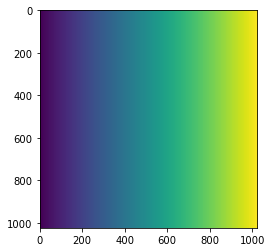

In [3]:
# Understanding Numba Code

import numpy
from numba import cuda

def escape_time(p, maxtime):
    """Perform the Mandelbrot iteration until it's clear that p diverges
    or the maximum number of iterations has been reached.
    """
    z = 0j
    for i in range(maxtime):
        z = z ** 2 + p
        if abs(z) > 2:
            return i
    return maxtime

escape_time_gpu = cuda.jit(device=True)(escape_time)

@cuda.jit
def mandelbrot_gpu(M, real_min, real_max, imag_min, imag_max):
    """Calculate the Mandelbrot set on the GPU.
    
    Parameters
    ----------
    M : numpy.ndarray
        a two-dimensional integer array that will contain the 
        escape times for each point.
    real_min: float
        minimum value on the real axis
    real_max: float
        maximum value on the real axis
    imag_min: float
        minimum value on the imaginary axis
    imag_max: float
        maximum value on the imaginary axis
    """
    ny, nx = M.shape
    i, j = cuda.grid(2)
    
    if i < ny and j < nx:
        dx = (real_max - real_min) / nx
        dy = (imag_max - imag_min) / ny
        p = real_min + dx * i + (imag_min + dy * j) * 1j
        M[i, j] = j#escape_time_gpu(p, 20)
        
        
M = numpy.zeros((1024, 1024), dtype=numpy.int32)
block = (32, 32)
grid = (M.shape[0] // block[0] if M.shape[0] % block[0] == 0 
            else M.shape[0] // block[0] + 1,
        int(M.shape[0] // block[1] if M.shape[1] % block[1] == 0 
            else M.shape[1] // block[1] + 1))


mandelbrot_gpu[grid, block](M, -2.0, 2.0, -1.6, 1.6)

plt.imshow(M, interpolation="nearest")


In [717]:
# Predicted Value from Regression Model is

a = np.fromfile('/media/pranjal/BackupPlus/REAL-DBT-PROJECTIONS/RECONS-HUBER/xiaoyu_data-LE-L-CC_3200x1280x58.0_0_0.0005_0_1_anistropic_normal8_1.raw', dtype='float32')
a = np.reshape(a, [58, 1280, 3200])

d = np.fromfile('/media/pranjal/BackupPlus/REAL-DBT-PROJECTIONS/RECONS-HUBER/xiaoyu_data-LE-L-CC_3200x1280x58.0_0_0.0005_-0.1_1_anistropic_three8_1.raw', dtype='float32')
d = np.reshape(d, [58, 1280, 3200])

Y_array = d
X_array = a

ind_z = 43
ind_y = 1000
ind_x = 2200

tx = X_array[ind_z-2:ind_z+3, ind_y-2:ind_y+3, ind_x-2:ind_x+3]
ty = Y_array[ind_z,           ind_y, ind_x]

X_test = np.array([tx.flatten()])
print(X_test.shape)

tp1 = np.dot(X_test, regr.coefs_[0])
tp2 = tp1 + regr.intercepts_[0]
tp3 = np.tanh(tp2)

print(tp3.shape, regr.coefs_[1].shape, regr.intercepts_[1].shape)

tp4 = np.dot(tp3, regr.coefs_[1])
tp4 = tp4 + regr.intercepts_[1]

print('Predicted Value From Model is ', tp4)
print('Ground Truth Value is         ', ty)
print(X_array[ind_z,           ind_y, ind_x])

(1, 125)
(1, 25) (25, 1) (1,)
Predicted Value From Model is  [[0.02117195]]
Ground Truth Value is          0.021088189
0.0209226


In [718]:
e = np.fromfile('/media/pranjal/BackupPlus/REAL-DBT-PROJECTIONS/RECONS-HUBER/xiaoyu_data-LE-L-CC_3200x1280x58.0_0_0.0005_0_1_anistropic_result8_a_1.raw', dtype='float32')
e = np.reshape(e, [58, 1280, 3200])

In [722]:
print(e[27, 1152, 1315])
print(d[27, 1152, 1315])
print(d[27, 1152, 1315] - e[27, 1152, 1315])

0.039948188
0.04013158
0.00018339232


In [2]:
import numba
from numba import njit, prange
from numba import cuda

In [10]:
# Define the dimensions of the volume
IMGSIZx = 3200
IMGSIZy = 1280
IMGSIZz = 58

# Cuda Kernel to calculate mean of neighboring voxels for each voxel
@cuda.jit(debug=True)
def calculate_mean(outbuf, inbuf):
    # Calculate the index of the voxel being considered
    
    ind_x, ind_y, ind_z = cuda.grid(3)
    #ind_x = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
    #ind_y = cuda.blockIdx.y * cuda.blockDim.y + cuda.threadIdx.y
    #ind_z = cuda.blockIdx.z * cuda.blockDim.z + cuda.threadIdx.z
    
    if ind_x < 0 or  ind_y < 0 or  ind_z < 0:
        return
    
    if ind_x > IMGSIZx-1 or ind_y > IMGSIZy-1 or ind_z > IMGSIZz-1:
        return
    
    sum1    = 0.0
    counter = 0
    for ind_nr_z in range(ind_z-2, ind_z+3):
        for ind_nr_y in range(ind_y-2, ind_y+3):
            for ind_nr_x in range(ind_x-2, ind_x+3):
                if ind_nr_x<0 or ind_nr_y<0 or ind_nr_z<0:
                    continue
                
                if ind_nr_x>(IMGSIZx-1) or ind_nr_y>(IMGSIZy-1) or ind_nr_z>(IMGSIZz-1):
                    continue
                
                sum1    = sum1 + inbuf[ind_nr_z, ind_nr_y, ind_nr_x]
                counter = counter+1
    
    outbuf[ind_z, ind_y, ind_x] = sum1/counter
    return


# Create random input matrix for which to calculate voxel wise mean
inbuf = np.random.rand(58, 1280, 3200)
# Create output matrix to store the output 
outbuf  = np.zeros((58, 1280, 3200), np.float32)



# Code to Launch the Cuda kernel in Numba
# 8*400 = 3200 = IMGSIZx
# 8*160 = 1280 = IMGSIZy
# 2*29  = 58   = IMGSIZz
THREADS_PER_BLOCK = (8, 8, 2)
BLOCKS_PER_GRID   = (400, 160, 29)
calculate_mean[BLOCKS_PER_GRID, THREADS_PER_BLOCK](outbuf, inbuf)
cuda.synchronize()



# Checking result for a random voxel (c_z, c_y, c_x)
c_x = random.randint(0, IMGSIZx)
c_y = random.randint(0, IMGSIZy)
c_z = random.randint(0, IMGSIZz)
result_manual = np.mean(inbuf[c_z-2:c_z+3,c_y-2:c_y+3,c_x-2:c_x+3])
result_cuda   = outbuf[c_z, c_y, c_x]
print(result_manual, result_cuda)

0.5002435831882374 0.5002436


In [5]:
# Checking result for a random voxel (c_z, c_y, c_x)
c_x = random.randint(0, IMGSIZx)
c_y = random.randint(0, IMGSIZy)
c_z = random.randint(0, IMGSIZz)
result_manual = np.mean(inbuf[c_z-2:c_z+3,c_y-2:c_y+3,c_x-2:c_x+3])
result_cuda   = outbuf[c_z, c_y, c_x]
print(result_manual, result_cuda)

0.4530233603179261 0.45302337


In [6]:
print(c_x, c_y, c_z)

84 542 22


In [7]:
result_manual = np.mean(inbuf[c_z-2:c_z+3,c_y-2:c_y+3,c_x-2:c_x+3].flatten())

In [8]:
print(result_manual)

0.4530233603179261
